<a href="https://colab.research.google.com/github/parthchittawar/Machine-Learning/blob/main/Time_series_forcasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time series fundamentals + BitPredict

### Get Data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-03-26 04:34:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2022-03-26 04:34:22 (16.8 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"closing price (USD)": "prices"})
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


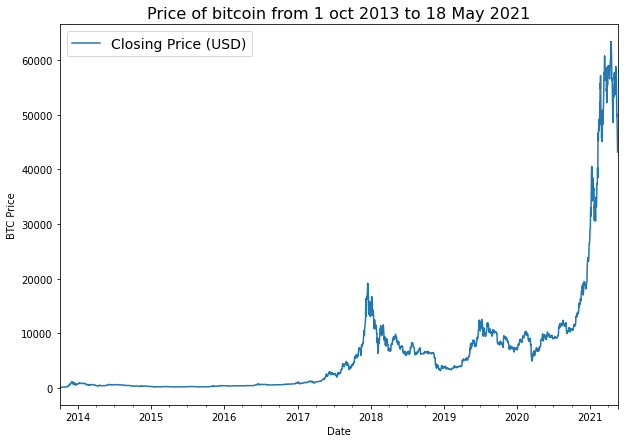

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1 oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)

### Importing time series data with python's csv module

In [ ]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)  # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))  # get thw dates as dates not strings
    btc_price.append(float(line[2]))    #  get the price as float

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

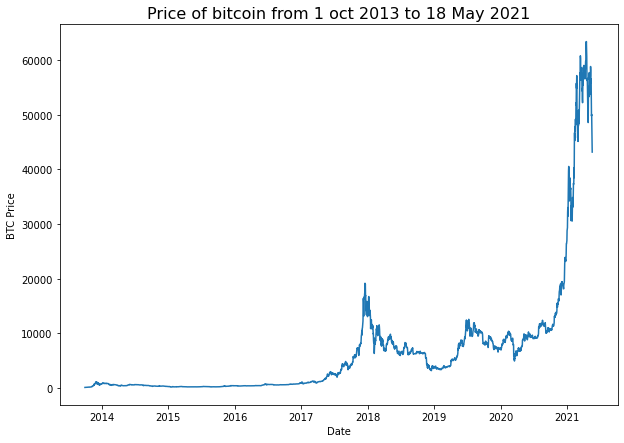

In [ ]:
# plot csv
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1 oct 2013 to 18 May 2021", fontsize=16)

plt.xlabel("Date")

### Create train  and test sets with time series data(the wrong way)

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Closing Price (USD)"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,   # dates
                                                    prices,   #  BTC prices
                                                    test_size = 0.2,
                                                    random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

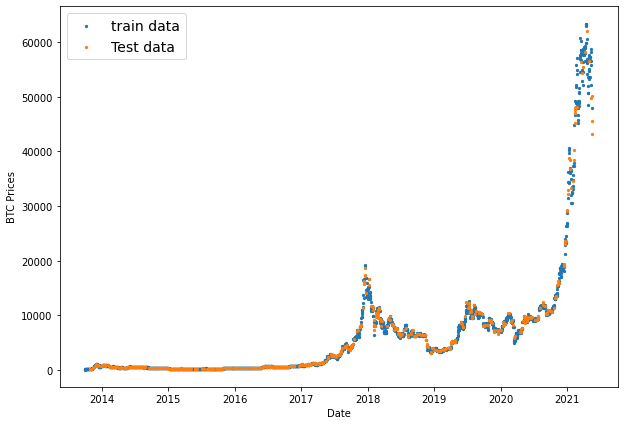

In [ ]:
# plot wronng train test split
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Prices")
plt.legend(fontsize=14)
plt.show()

### Create train and test sets for time series (the right way)

In [ ]:
#create train and test split the right way
split_size = int(0.8 * len(prices))     # 80% train 20% TEST


#  create train data splits (everything before split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

#  create test data splits  ( everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2229, 2229, 558, 558)

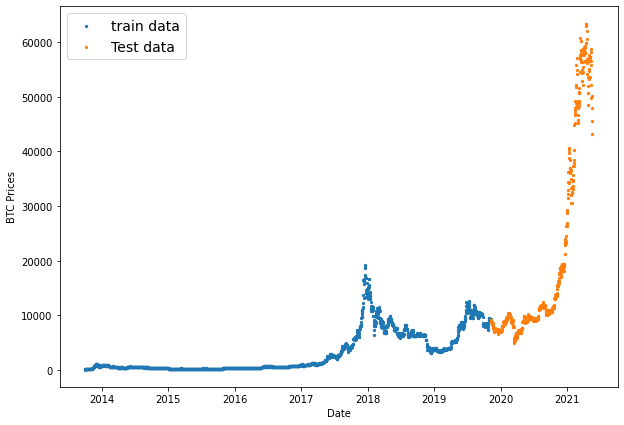

In [ ]:
# plot these plit
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Prices")
plt.legend(fontsize=14)
plt.show()

### Createing a plotting function

In [ ]:
# create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):

  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC_prices")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)


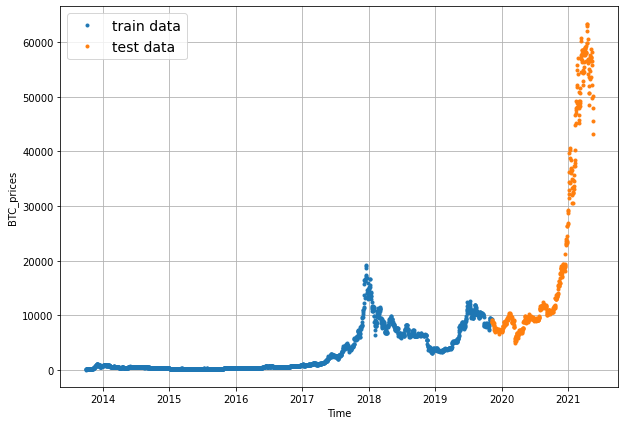

In [ ]:
# test the function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="train data")
plot_time_series(timesteps=X_test, values=y_test, label="test data")

# Modelling experiments

horizon = number of timesteps to predict into future


window = number of timesteps from past used to predict horizon

## Model 0: Naive forcast(baseline)
One of the most common baseline models for time series forecasting, the naïve model (also called the naïve forecast), requires no training at all.

That's because all the naïve model does is use the previous timestep value to predict the next timestep value.

The formula looks like this:  
$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).

In [ ]:
# create a naive forcast
naive_forecast = y_test[:-1]  # Naïve forecast equals every value excluding the last value

naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

In [ ]:
X_test[1:]

array(['2019-11-09T00:00:00.000000000', '2019-11-10T00:00:00.000000000',
       '2019-11-11T00:00:00.000000000', '2019-11-12T00:00:00.000000000',
       '2019-11-13T00:00:00.000000000', '2019-11-14T00:00:00.000000000',
       '2019-11-15T00:00:00.000000000', '2019-11-16T00:00:00.000000000',
       '2019-11-17T00:00:00.000000000', '2019-11-18T00:00:00.000000000',
       '2019-11-19T00:00:00.000000000', '2019-11-20T00:00:00.000000000',
       '2019-11-21T00:00:00.000000000', '2019-11-22T00:00:00.000000000',
       '2019-11-23T00:00:00.000000000', '2019-11-24T00:00:00.000000000',
       '2019-11-25T00:00:00.000000000', '2019-11-26T00:00:00.000000000',
       '2019-11-27T00:00:00.000000000', '2019-11-28T00:00:00.000000000',
       '2019-11-29T00:00:00.000000000', '2019-11-30T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2019-12-02T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-12-04T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000', '2019-12-06

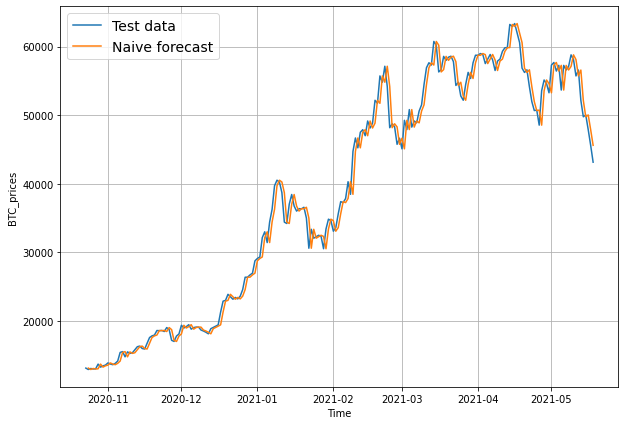

In [ ]:
#plot naive forecast
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test,format="-",start=350, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,format="-",start=350, label="Naive forecast")

## Evaluating a time series model

In [ ]:
import tensorflow as tf

In [ ]:
# MASE implementaion
def mean_absolute_scaled_error(y_true, y_pred):
  """
  implement MASE (assuming no seasonality in the data)
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # find the mae of the naive forcast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_pred[:-1]))  # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.6921240375097498

In [ ]:
import math

In [ ]:
def evaluate_preds(y_true, y_pred):

  # make dure float32 data type

  y_pred = tf.cast(y_pred, dtype=tf.float32)
  y_true - tf.cast(y_true, dtype=tf.float32)


  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse":mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Format Data part 2: Windowing datasets

Why do we window?

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]

[1, 2, 3, 4, 5, 6, 7] -> [8]

[2, 3, 4, 5, 6, 7, 8] -> [9]

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
print(f"We want to use: {btc_price[:7]} to predict this {btc_price[7]} ")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033 


In [ ]:
# setting up global variables
HORIZON = 1  # predict the next one day
WINDOW_SIZE = 7 # we make use of past week bitcoin data to make the prediction


In [ ]:
# create a function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  creates labels for windowed dataset
  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[: , :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8),axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
tf.expand_dims(tf.range(8)+1, axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7, 8]], dtype=int32)>

In [ ]:
#np.arange(window_size+horizon)

In [ ]:
import numpy as np

In [ ]:
# Create function to view numpy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  turns a 1d array into a 2d array of sequential labbeled windows of window_size with horizon labels
  """
  # 1. creating a window of specific window_size (add the horizon at the end of the labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. create a 2d array of multiple window  steps (minus 1 for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon -1 )), axis=0).T 

  #print(f"Window indexes: {window_indexes, window_indexes.shape}")

  # 3. index on the target array (a time series) withh 2d array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
np.expand_dims(np.arange(8), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [ ]:
for i in np.arange(3):
  print(f"Windows: {full_windows[i]} -> Labels: {full_labels[i]}")

Windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Labels: [123.033]
Windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Labels: [124.049]
Windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Labels: [125.96116]


## Turning windows into training and test sets

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# make train test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits the matching pairs of windows and labels into training and test splits
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [ ]:
# create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make modelling checkpoint

we want to compare each model's best performance against each model's best performance.

In [ ]:
import os

# create a function to implement a ModelCheckpoint callback with a specific file name

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense Model (window = 7, horizon=1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(HORIZON, activation="linear")
], name="model_1_Dense")

model_1.compile(loss="mae", 
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name,
            )])

Epoch 1/100
18/18 [==============================] - 4s 55ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
Epoch 2/100
18/18 [==============================] - 1s 35ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
Epoch 4/100
18/18 [==============================] - 1s 66ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
Epoch 5/100
18/18 [==============================] - 1s 70ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.7969 - val_loss: 895.2238 - val_mae: 895.2238 - val_mse: 2564574.0000
Epoch 6/100
18/18 [==============================] - 1s 73ms/step - loss: 158.5

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
# evaluate 
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
# load in the saved best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1_Dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

## Making forcasts with the model 

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input  data
  """
  forcast = model.predict(input_data)
  return tf.squeeze(forcast)     #return 1D array of predictions

In [ ]:
# make predictions
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(556, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.711, 8769.886, 9015.71 , 8795.517, 8723.809, 8730.11 ,
        8691.95 , 8502.054, 8460.961, 8516.547], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([556]), TensorShape([556]))

In [ ]:
test_labels.dtype

dtype('float64')

In [ ]:
test_labels = tf.cast(test_labels, dtype=tf.float32)

In [ ]:
test_labels.dtype

tf.float32

In [ ]:
model_1_preds.dtype

tf.float32

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

In [ ]:
X_test[:10]

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000'],
      dtype='datetime64[ns]')

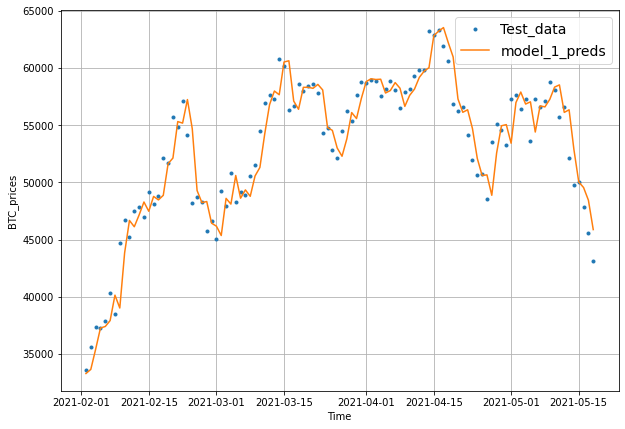

In [ ]:
# plot the model_1 predictions
offset = 450
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense(window=30, horizon=1)

In [ ]:
HORIZON = 1
WINDOW_SIZE=30


In [ ]:
prices

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
# make windowed data with appropriate horizon and window size
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(HORIZON)
], name="model_2_dense")


# copile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),

                )
# fit the  model
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])


INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# evalauate
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# lload the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")

In [ ]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# get forcast predictions
model_2_preds = make_preds(model_2, 
                           input_data=test_windows)

In [ ]:
model_2_preds.shape

TensorShape([552])

In [ ]:
test_labels.shape

(552, 1)

In [ ]:
test_labels = tf.cast(test_labels, dtype=tf.float32)

In [ ]:
# results
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 0.71157324,
 'mse': 1281438.8,
 'rmse': 1132.0065}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
test_labels[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[8749.5205],
       [8656.971 ],
       [8500.644 ],
       [8469.261 ],
       [8537.34  ]], dtype=float32)>

In [ ]:
test_labels[:, 0]

<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8749.5205,  8656.971 ,  8500.644 ,  8469.261 ,  8537.34  ,
        8205.807 ,  8118.489 ,  8074.8433,  7612.7407,  7262.1104,
        7303.406 ,  7041.733 ,  7211.862 ,  7141.0693,  7523.4805,
        7390.2075,  7729.266 ,  7542.236 ,  7381.963 ,  7333.433 ,
        7315.3677,  7213.734 ,  7398.787 ,  7511.8804,  7532.1235,
        7550.2393,  7333.096 ,  7239.7627,  7198.067 ,  7190.2725,
        7238.8745,  7087.025 ,  7112.7314,  6883.4966,  6584.029 ,
        7424.0156,  7147.5684,  7139.9336,  7286.335 ,  7236.9863,
        7166.1724,  7235.6265,  7212.8096,  7183.7065,  7227.294 ,
        7311.5605,  7385.465 ,  7251.277 ,  7179.958 ,  7174.744 ,
        6955.488 ,  7291.2197,  7337.6367,  7347.433 ,  7713.861 ,
        8039.6035,  8067.6064,  7808.701 ,  8087.453 ,  8078.9937,
        8149.3135,  8116.961 ,  8735.143 ,  8843.676 ,  8711.638 ,
        8925.299 ,  8939.864 ,  8638.182 ,  8652.684 ,  8708.786 ,
        8635.0

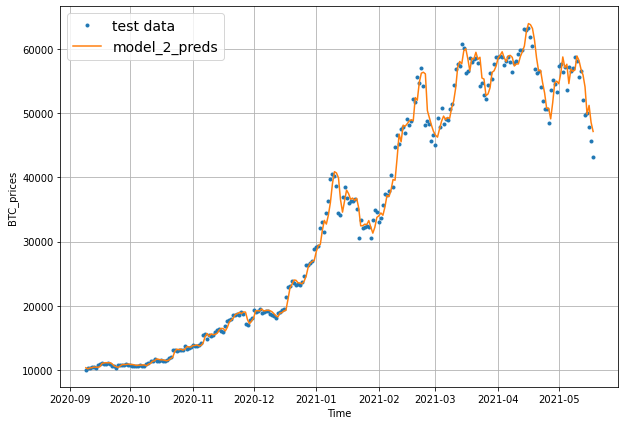

In [ ]:
# plot the model
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset,format="-", label="model_2_preds")

## Model 3: Dense(window= 30, horizon=7)

In [ ]:
HORIZON=7
WINDOW_SIZE=30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE,
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# create model samme  as model_1 except with diffrent data input and output sizes

model_3 = tf.keras.Sequential([
        layers.Dense(128, activation="relu"),
        layers.Dense(HORIZON)
], name="model_3_dense")

# compile

model_3.compile(loss="MAE", 
                optimizer=tf.keras.optimizers.Adam())

# fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# evaluate
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1321.5201


1321.5201416015625

In [ ]:
# load best version
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063


1237.50634765625

In [ ]:
# make predictions with model 3
model_3_preds = make_preds(model_3, input_data=test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.258 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.328 ,
        9156.819 ],
       [8672.508 , 8782.388 , 9123.8545, 8770.37  , 9007.13  , 9003.87  ,
        9042.723 ],
       [8874.398 , 8784.737 , 9043.901 , 8943.051 , 9033.479 , 9176.488 ,
        9039.676 ],
       [8825.891 , 8777.4375, 8926.779 , 8870.178 , 9213.232 , 9268.156 ,
        8942.485 ]], dtype=float32)>

In [ ]:
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8946.987, 8967.846, 8820.251, 8615.828, 8485.796], dtype=float32)>

In [ ]:
test_labels.dtype

dtype('float64')

In [ ]:
test_labels = tf.cast(test_labels, dtype=tf.float32)

In [ ]:
model_2_preds.shape, model_3_preds.shape

(TensorShape([552]), TensorShape([551, 7]))

In [ ]:
# evaluate model3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 513.60516 ,  355.08356 ,  327.1702  ,  358.50977 ,  420.53207 ,
         537.8537  ,  545.6606  ,  485.92307 ,  584.497   ,  687.3814  ,
         836.22675 ,  755.1571  ,  731.4958  ,  775.3398  ,  567.9547  ,
         266.80865 ,  188.80217 ,  188.1077  ,  253.09521 ,  301.4336  ,
         151.1075  ,  196.81432 ,  191.46184 ,  231.65067 ,  143.6114  ,
         122.59033 ,  132.78836 ,  190.81152 ,  179.1598  ,  228.25955 ,
         314.44016 ,  379.093   ,  278.3254  ,  295.34604 ,  299.38525 ,
         248.64983 ,  299.7564  ,  259.6937  ,  180.30559 ,  206.72873 ,
         374.62897 ,  144.85129 ,  142.33601 ,  131.11572 ,   93.94057 ,
          54.825615,   73.7943  ,  103.59996 ,  121.33378 ,  168.67215 ,
         183.90945 ,  152.25314 ,  186.57129 ,  146.91309 ,  240.42955 ,
         351.00668 ,  540.9516  ,  549.15674 ,  521.2422  ,  526.8553  ,
         453.36307 ,  257.98166 ,  277.29492 ,  301.82465 ,  455.71756 ,
         458.9599  ,  503.44427 ,  522.3119 

## make our evaluation function work for larger horizons

In [ ]:
def evaluate_preds(y_true, y_pred):

  # make dure float32 data type

  y_pred = tf.cast(y_pred, dtype=tf.float32)
  y_true - tf.cast(y_true, dtype=tf.float32)


  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)



  return {"mae": mae.numpy(),
          "mse":mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 5.5588784,
 'mase': 0.88004005,
 'mse': 5405198.0,
 'rmse': 1425.7477}

In [ ]:
test_labels[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[8794.358 , 8798.042 , 9081.187 , 8711.534 , 8760.893 , 8749.5205,
        8656.971 ],
       [8798.042 , 9081.187 , 8711.534 , 8760.893 , 8749.5205, 8656.971 ,
        8500.644 ],
       [9081.187 , 8711.534 , 8760.893 , 8749.5205, 8656.971 , 8500.644 ,
        8469.261 ],
       [8711.534 , 8760.893 , 8749.5205, 8656.971 , 8500.644 , 8469.261 ,
        8537.34  ],
       [8760.893 , 8749.5205, 8656.971 , 8500.644 , 8469.261 , 8537.34  ,
        8205.807 ]], dtype=float32)>

In [ ]:
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.258 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.328 ,
        9156.819 ],
       [8672.508 , 8782.388 , 9123.8545, 8770.37  , 9007.13  , 9003.87  ,
        9042.723 ],
       [8874.398 , 8784.737 , 9043.901 , 8943.051 , 9033.479 , 9176.488 ,
        9039.676 ],
       [8825.891 , 8777.4375, 8926.779 , 8870.178 , 9213.232 , 9268.156 ,
        8942.485 ]], dtype=float32)>

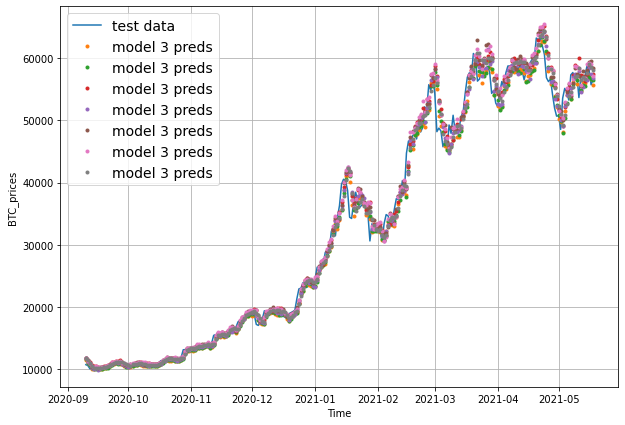

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format="-", label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model 3 preds")

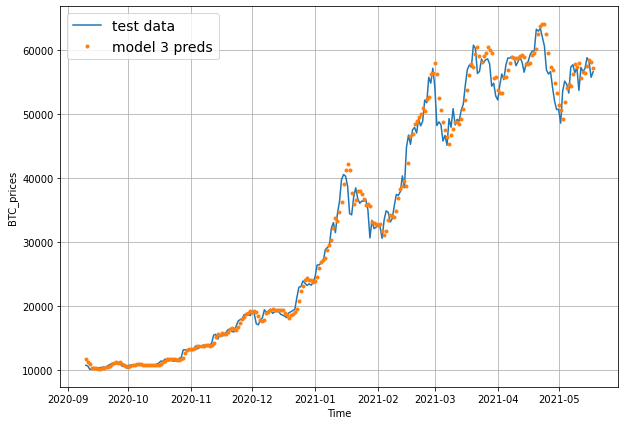

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format="-", label="test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), start=offset, label="model 3 preds")

## Which of our models is performing best so far

In [ ]:
import pandas as pd

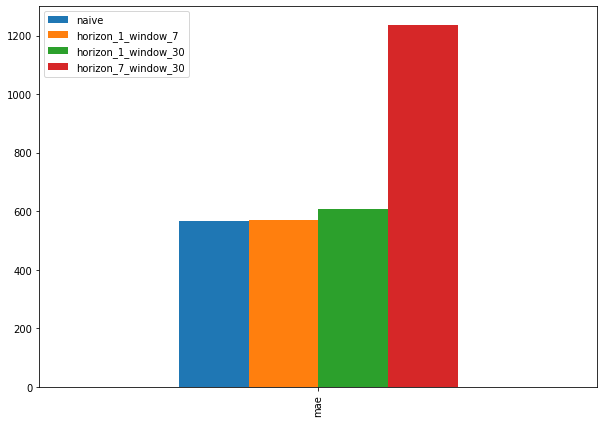

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D

In [ ]:
HORIZON=1
WINDOW_SIZE=7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

conv1d input shape required (batch_size, timesteps, input_dim)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# before passing data to conv 1d, we have to reshape it in pprder to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))   # add extra dimention for input_dim

In [ ]:
print(f"Original shape: {x.shape}")  # window size
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
      layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
      layers.Conv1D(filters=128, kernel_size=5, strides=1, padding="causal", activation="relu"),
      layers.Dense(HORIZON)
], name="model_4_conv1d")

# compile
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                )
# fit
model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 567.8515


567.8515014648438

In [ ]:
# load best performing conv1d model
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 564.0364


564.0364379882812

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8858.367, 8776.221, 9032.426, 8791.299, 8742.579, 8744.135,
       8680.76 , 8526.948, 8463.215, 8527.108], dtype=float32)>

In [ ]:
test_labels = tf.cast(test_labels, dtype=tf.float32)

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 564.03644,
 'mape': 2.5296803,
 'mase': 0.68558574,
 'mse': 1155166.4,
 'rmse': 1074.7866}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

## Model 5: RNN (LSTM)

In [ ]:
train_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [ ]:
tf.random.set_seed(42)

# build LSTM model with functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs,outputs= outputs, name="model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

#fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])







Epoch 1/100
64/70 [==========================>...] - ETA: 0s - loss: 987.8054 INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 5s 47ms/step - loss: 923.8335 - val_loss: 999.7739
Epoch 2/100
70/70 [==============================] - 1s 8ms/step - loss: 174.3591 - val_loss: 1059.5967
Epoch 3/100
63/70 [==========================>...] - ETA: 0s - loss: 170.6284INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 40ms/step - loss: 169.0976 - val_loss: 915.7005
Epoch 4/100
70/70 [==============================] - 1s 8ms/step - loss: 164.8597 - val_loss: 961.9780
Epoch 5/100
65/70 [==========================>...] - ETA: 0s - loss: 165.1163INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 4s 53ms/step - loss: 162.1378 - val_loss: 881.1056
Epoch 6/100
70/70 [==============================] - 1s 18ms/step - loss: 154.4248 - val_loss: 1048.9911
Epoch 7/100
70/70 [==============================] - ETA: 0s - loss: 151.9672INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 7s 98ms/step - loss: 151.9672 - val_loss: 817.6928
Epoch 8/100
69/70 [============================>.] - ETA: 0s - loss: 149.2738INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 10s 142ms/step - loss: 148.8312 - val_loss: 783.2537
Epoch 9/100
70/70 [==============================] - 1s 16ms/step - loss: 140.9373 - val_loss: 801.6102
Epoch 10/100
70/70 [==============================] - 1s 17ms/step - loss: 145.7706 - val_loss: 848.7533
Epoch 11/100
70/70 [==============================] - ETA: 0s - loss: 138.0576INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 7s 99ms/step - loss: 138.0576 - val_loss: 777.6635
Epoch 12/100
69/70 [============================>.] - ETA: 0s - loss: 135.4103INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 7s 100ms/step - loss: 136.0284 - val_loss: 724.0184
Epoch 13/100
70/70 [==============================] - 1s 15ms/step - loss: 131.3889 - val_loss: 955.6835
Epoch 14/100
70/70 [==============================] - 1s 19ms/step - loss: 133.7509 - val_loss: 789.2673
Epoch 15/100
69/70 [============================>.] - ETA: 0s - loss: 128.5639INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 6s 92ms/step - loss: 128.5206 - val_loss: 684.2522
Epoch 16/100
67/70 [===========================>..] - ETA: 0s - loss: 127.8474INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 7s 102ms/step - loss: 126.0890 - val_loss: 670.2017
Epoch 17/100
70/70 [==============================] - 1s 15ms/step - loss: 123.1890 - val_loss: 734.0807
Epoch 18/100
70/70 [==============================] - ETA: 0s - loss: 130.8150INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 6s 80ms/step - loss: 130.8150 - val_loss: 654.8057
Epoch 19/100
70/70 [==============================] - 1s 15ms/step - loss: 124.7924 - val_loss: 701.4979
Epoch 20/100
70/70 [==============================] - 1s 17ms/step - loss: 119.9927 - val_loss: 657.3366
Epoch 21/100
70/70 [==============================] - 1s 17ms/step - loss: 120.1237 - val_loss: 677.9832
Epoch 22/100
67/70 [===========================>..] - ETA: 0s - loss: 120.3324INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 5s 75ms/step - loss: 119.3269 - val_loss: 644.2039
Epoch 23/100
70/70 [==============================] - 1s 18ms/step - loss: 122.7527 - val_loss: 730.0672
Epoch 24/100
67/70 [===========================>..] - ETA: 0s - loss: 119.4342INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 5s 73ms/step - loss: 118.7916 - val_loss: 630.5242
Epoch 25/100
68/70 [============================>.] - ETA: 0s - loss: 119.8565INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 6s 83ms/step - loss: 119.3101 - val_loss: 622.8290
Epoch 26/100
70/70 [==============================] - 1s 15ms/step - loss: 124.2459 - val_loss: 632.5374
Epoch 27/100
70/70 [==============================] - 1s 13ms/step - loss: 121.0155 - val_loss: 688.8676
Epoch 28/100
69/70 [============================>.] - ETA: 0s - loss: 115.0017INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 5s 73ms/step - loss: 115.0216 - val_loss: 611.2283
Epoch 29/100
70/70 [==============================] - 1s 17ms/step - loss: 119.5380 - val_loss: 624.9886
Epoch 30/100
70/70 [==============================] - 1s 15ms/step - loss: 115.5532 - val_loss: 615.2354
Epoch 31/100
70/70 [==============================] - 1s 14ms/step - loss: 116.2119 - val_loss: 677.5516
Epoch 32/100
70/70 [==============================] - 1s 15ms/step - loss: 114.9912 - val_loss: 615.0753
Epoch 33/100
70/70 [==============================] - 1s 15ms/step - loss: 115.1890 - val_loss: 660.7305
Epoch 34/100
70/70 [==============================] - 1s 17ms/step - loss: 121.4952 - val_loss: 617.4861
Epoch 35/100
67/70 [===========================>..] - ETA: 0s - loss: 114.1037INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 5s 71ms/step - loss: 114.3644 - val_loss: 601.5713
Epoch 36/100
70/70 [==============================] - 1s 8ms/step - loss: 115.0390 - val_loss: 638.0242
Epoch 37/100
70/70 [==============================] - 1s 8ms/step - loss: 115.5464 - val_loss: 630.5695
Epoch 38/100
70/70 [==============================] - 1s 8ms/step - loss: 127.9032 - val_loss: 729.8559
Epoch 39/100
70/70 [==============================] - 1s 8ms/step - loss: 119.1472 - val_loss: 768.5615
Epoch 40/100
64/70 [==========================>...] - ETA: 0s - loss: 121.4151INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 44ms/step - loss: 120.7206 - val_loss: 593.0182
Epoch 41/100
70/70 [==============================] - 1s 8ms/step - loss: 111.7753 - val_loss: 658.1000
Epoch 42/100
70/70 [==============================] - 1s 8ms/step - loss: 112.6755 - val_loss: 603.8367
Epoch 43/100
70/70 [==============================] - 1s 8ms/step - loss: 113.0656 - val_loss: 609.7616
Epoch 44/100
70/70 [==============================] - 1s 8ms/step - loss: 115.2705 - val_loss: 702.2465
Epoch 45/100
70/70 [==============================] - ETA: 0s - loss: 112.9802INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 39ms/step - loss: 112.9802 - val_loss: 587.7276
Epoch 46/100
70/70 [==============================] - 1s 8ms/step - loss: 123.1217 - val_loss: 670.1470
Epoch 47/100
70/70 [==============================] - 1s 8ms/step - loss: 114.0793 - val_loss: 736.3588
Epoch 48/100
64/70 [==========================>...] - ETA: 0s - loss: 115.1196INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 39ms/step - loss: 116.1055 - val_loss: 584.6569
Epoch 49/100
64/70 [==========================>...] - ETA: 0s - loss: 112.0137INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 39ms/step - loss: 111.6030 - val_loss: 584.3057
Epoch 50/100
70/70 [==============================] - 1s 8ms/step - loss: 113.0661 - val_loss: 597.9453
Epoch 51/100
70/70 [==============================] - 1s 8ms/step - loss: 115.9821 - val_loss: 608.9384
Epoch 52/100
70/70 [==============================] - 1s 14ms/step - loss: 118.3501 - val_loss: 601.7729
Epoch 53/100
70/70 [==============================] - 1s 9ms/step - loss: 110.5680 - val_loss: 591.6522
Epoch 54/100
70/70 [==============================] - 1s 8ms/step - loss: 112.0331 - val_loss: 598.9569
Epoch 55/100
70/70 [==============================] - ETA: 0s - loss: 110.0360INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 44ms/step - loss: 110.0360 - val_loss: 578.8580
Epoch 56/100
70/70 [==============================] - 1s 8ms/step - loss: 113.3981 - val_loss: 651.3944
Epoch 57/100
70/70 [==============================] - 1s 8ms/step - loss: 113.3236 - val_loss: 579.8795
Epoch 58/100
70/70 [==============================] - 1s 7ms/step - loss: 110.9348 - val_loss: 594.9958
Epoch 59/100
70/70 [==============================] - 1s 8ms/step - loss: 111.0760 - val_loss: 598.4814
Epoch 60/100
70/70 [==============================] - 1s 8ms/step - loss: 110.0784 - val_loss: 624.2545
Epoch 61/100
70/70 [==============================] - 1s 8ms/step - loss: 113.0026 - val_loss: 633.1198
Epoch 62/100
70/70 [==============================] - 1s 8ms/step - loss: 109.7577 - val_loss: 580.9925
Epoch 63/100
65/70 [==========================>...] - ETA: 0s - loss: 110.3559INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 39ms/step - loss: 108.9819 - val_loss: 577.5331
Epoch 64/100
70/70 [==============================] - 1s 8ms/step - loss: 113.2528 - val_loss: 626.8891
Epoch 65/100
70/70 [==============================] - 1s 8ms/step - loss: 111.6353 - val_loss: 578.3519
Epoch 66/100
70/70 [==============================] - 1s 8ms/step - loss: 109.5341 - val_loss: 612.4695
Epoch 67/100
70/70 [==============================] - ETA: 0s - loss: 109.4162INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 39ms/step - loss: 109.4162 - val_loss: 573.5859
Epoch 68/100
70/70 [==============================] - 1s 8ms/step - loss: 108.1778 - val_loss: 574.8296
Epoch 69/100
70/70 [==============================] - 1s 8ms/step - loss: 115.6086 - val_loss: 685.5193
Epoch 70/100
70/70 [==============================] - 1s 8ms/step - loss: 110.8787 - val_loss: 575.0035
Epoch 71/100
70/70 [==============================] - 1s 8ms/step - loss: 113.6486 - val_loss: 708.1357
Epoch 72/100
70/70 [==============================] - 1s 8ms/step - loss: 111.9779 - val_loss: 637.9172
Epoch 73/100
70/70 [==============================] - 1s 8ms/step - loss: 108.1487 - val_loss: 573.9628
Epoch 74/100
70/70 [==============================] - ETA: 0s - loss: 111.4731INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 45ms/step - loss: 111.4731 - val_loss: 573.0732
Epoch 75/100
70/70 [==============================] - 1s 8ms/step - loss: 109.8500 - val_loss: 693.3409
Epoch 76/100
70/70 [==============================] - 1s 8ms/step - loss: 113.6984 - val_loss: 578.7044
Epoch 77/100
70/70 [==============================] - 1s 8ms/step - loss: 110.2632 - val_loss: 584.1360
Epoch 78/100
70/70 [==============================] - 1s 8ms/step - loss: 110.2029 - val_loss: 573.2185
Epoch 79/100
70/70 [==============================] - 1s 15ms/step - loss: 112.6008 - val_loss: 605.0822
Epoch 80/100
63/70 [==========================>...] - ETA: 0s - loss: 116.7880INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 46ms/step - loss: 114.8586 - val_loss: 572.6846
Epoch 81/100
70/70 [==============================] - 1s 8ms/step - loss: 108.8074 - val_loss: 640.2347
Epoch 82/100
70/70 [==============================] - 1s 8ms/step - loss: 116.8868 - val_loss: 730.2236
Epoch 83/100
70/70 [==============================] - 1s 8ms/step - loss: 110.3225 - val_loss: 573.4822
Epoch 84/100
67/70 [===========================>..] - ETA: 0s - loss: 109.7870INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 41ms/step - loss: 108.9233 - val_loss: 569.6893
Epoch 85/100
70/70 [==============================] - 1s 8ms/step - loss: 107.2475 - val_loss: 572.3964
Epoch 86/100
70/70 [==============================] - 1s 8ms/step - loss: 113.9578 - val_loss: 592.4644
Epoch 87/100
70/70 [==============================] - 1s 8ms/step - loss: 109.9852 - val_loss: 587.0518
Epoch 88/100
70/70 [==============================] - 1s 8ms/step - loss: 112.5881 - val_loss: 580.7665
Epoch 89/100
70/70 [==============================] - 1s 8ms/step - loss: 110.0377 - val_loss: 684.1954
Epoch 90/100
70/70 [==============================] - 1s 8ms/step - loss: 111.3718 - val_loss: 620.7050
Epoch 91/100
70/70 [==============================] - 1s 8ms/step - loss: 111.0433 - val_loss: 626.7573
Epoch 92/100
67/70 [===========================>..] - ETA: 0s - loss: 110.0099INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


70/70 [==============================] - 3s 40ms/step - loss: 109.8147 - val_loss: 568.9501
Epoch 93/100
70/70 [==============================] - 1s 8ms/step - loss: 107.7831 - val_loss: 590.5982
Epoch 94/100
70/70 [==============================] - 1s 8ms/step - loss: 112.7715 - val_loss: 621.3361
Epoch 95/100
70/70 [==============================] - 1s 8ms/step - loss: 110.3261 - val_loss: 602.2079
Epoch 96/100
70/70 [==============================] - 1s 8ms/step - loss: 114.0459 - val_loss: 642.1060
Epoch 97/100
70/70 [==============================] - 1s 8ms/step - loss: 114.3700 - val_loss: 578.8013
Epoch 98/100
70/70 [==============================] - 1s 8ms/step - loss: 110.4438 - val_loss: 578.9282
Epoch 99/100
70/70 [==============================] - 1s 8ms/step - loss: 111.1804 - val_loss: 580.5487
Epoch 100/100
70/70 [==============================] - 1s 8ms/step - loss: 109.8928 - val_loss: 570.3289


In [ ]:
# load best version of model
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9501


568.9500732421875

In [ ]:
# make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8886.394, 8785.116, 9050.36 , 8812.145, 8733.186], dtype=float32)>

In [ ]:
test_labels[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[8798.042 ],
       [9081.187 ],
       [8711.534 ],
       [8760.893 ],
       [8749.5205]], dtype=float32)>

In [ ]:
# evaluate model_5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels), y_pred=model_5_preds)

In [ ]:
model_5_results

{'mae': 568.95,
 'mape': 2.5381322,
 'mase': 0.69080454,
 'mse': 1174134.6,
 'rmse': 1083.575}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

## Make a multivariate time series dataset

In [ ]:
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving

In [ ]:
# let's  add bitcoin halving events to our dataset
block_reward_1 = 50 #3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25  # 28 November 2012
block_reward_3 = 12.5  # 9 July 2016
block_reward_4 = 6.25  # 18 May 2020

# block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_2_datetime

numpy.datetime64('2012-11-28')

In [ ]:
# create date ranges of where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2421)

In [ ]:
# add block reward column

bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# add block_reward values as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Closing Price (USD),block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


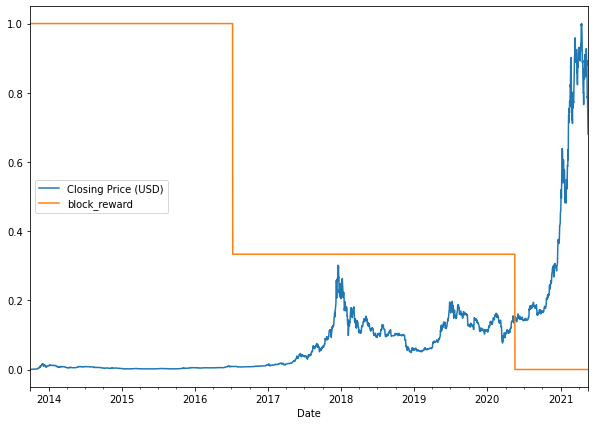

In [ ]:
# plot block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Closing Price (USD)", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)


scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas



In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# make  a copy of the bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i + 1}"] = bitcoin_prices_windowed["Closing Price (USD)"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Closing Price (USD),block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


Windowed the data set

```
[0,1,2,3,4,5,6, block_reward]  ->  [7]
```

In [ ]:
# Create X (windows) and y (horizons) features

X = bitcoin_prices_windowed.dropna().drop("Closing Price (USD)", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Closing Price (USD)"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Closing Price (USD), dtype: float32

In [ ]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense (multivariate time series)

In [ ]:
model_1.summary()

Model: "model_1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
   layers.Dense(128, activation="relu"),
   layers.Dense(HORIZON)

], name="model_6_dense_multivariate")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(X_train,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data = (X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 2853.4023INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 1234.6805 - val_loss: 2061.9080
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 337.7052INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 351.5053 - val_loss: 1908.6729
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 249.1731INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 208.6022INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 208.6112 - val_loss: 1102.1340
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 196.5770 - val_loss: 1107.8472
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 187.5235INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 187.2244 - val_loss: 1036.1722
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 182.0245INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 182.0245 - val_loss: 1019.2924
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 175.7059INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 175.7059 - val_loss: 977.8487
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 142.1689INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 170.1784 - val_loss: 954.4034
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 164.4430INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 81ms/step - loss: 164.4430 - val_loss: 913.5146
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 171.3627INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 158.6892 - val_loss: 874.2504
Epoch 12/100
 1/18 [>.............................] - ETA: 0s - loss: 147.0428INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 152.0732 - val_loss: 861.0414
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 151.1057 - val_loss: 886.1201
Epoch 14/100
15/18 [========================>.....] - ETA: 0s - loss: 144.7363INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 147.5482 - val_loss: 837.8613
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 142.3497INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 142.3497 - val_loss: 794.4784
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 135.8323INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 137.5206 - val_loss: 778.4048
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 125.1489INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 135.8191 - val_loss: 772.4528
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 134.8562INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 49ms/step - loss: 134.8562 - val_loss: 747.4800
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 130.3347 - val_loss: 761.0549
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 128.6775INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 128.6775 - val_loss: 701.8977
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 129.5576INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 129.5576 - val_loss: 691.0128
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 125.8060INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 125.8060 - val_loss: 684.4119
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 125.5263 - val_loss: 692.1294
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 134.1221INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 122.4765 - val_loss: 674.2213
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 121.1171INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 121.1171 - val_loss: 669.6445
Epoch 26/100
18/18 [==============================] - 0s 6ms/step - loss: 127.2623 - val_loss: 690.0408
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 180.3231INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 124.6204 - val_loss: 643.9725
Epoch 28/100
18/18 [==============================] - 0s 5ms/step - loss: 118.2544 - val_loss: 656.2766
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8149INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 119.6374 - val_loss: 633.4545
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 119.5001INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 119.5001 - val_loss: 625.3953
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5633 - val_loss: 668.5061
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 115.9088INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 116.9750 - val_loss: 617.1060
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2438 - val_loss: 649.0985
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5187 - val_loss: 632.1378
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 113.9084INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 113.6357 - val_loss: 607.4173
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2605 - val_loss: 626.4316
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 141.7286INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 113.7021 - val_loss: 606.2318
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 111.4061INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 111.4061 - val_loss: 603.2919
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 127.4214INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 112.7722 - val_loss: 596.0060
Epoch 40/100
18/18 [==============================] - ETA: 0s - loss: 110.5418INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 110.5418 - val_loss: 593.2170
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8671 - val_loss: 609.1066
Epoch 42/100
18/18 [==============================] - 0s 4ms/step - loss: 115.7249 - val_loss: 607.4875
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 111.3313 - val_loss: 606.2031
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 110.1866INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 109.7027 - val_loss: 586.1214
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 107.8748 - val_loss: 593.8447
Epoch 46/100
18/18 [==============================] - 0s 6ms/step - loss: 109.8641 - val_loss: 586.4578
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3587 - val_loss: 655.4485
Epoch 48/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1614 - val_loss: 598.7232
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3029 - val_loss: 589.2487
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1971 - val_loss: 649.3792
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8514 - val_loss: 602.7665
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 111.8331 - val_loss: 599.2959
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 110.4069 - val_loss: 575.7751
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6609 - val_loss: 785.9759
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 124.9824 - val_loss: 670.3788
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8591 - val_loss: 580.2875
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2513 - val_loss: 597.5087
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2322 - val_loss: 632.2953
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3519 - val_loss: 591.5410
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4084 - val_loss: 617.5808
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5326 - val_loss: 613.1470
Epoch 64/100
18/18 [==============================] - 0s 15ms/step - loss: 1

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 68ms/step - loss: 112.0475 - val_loss: 575.5543
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2830 - val_loss: 590.7806
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7917 - val_loss: 586.8845
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 112.2987 - val_loss: 696.5294
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 124.7808 - val_loss: 698.5267
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 119.3443 - val_loss: 581.2104
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 109.9960 - val_loss: 607.6739
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 106.7778INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 106.7710 - val_loss: 573.6144
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2485 - val_loss: 618.8955
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 105.5330 - val_loss: 574.9454
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3177 - val_loss: 606.1973
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8084 - val_loss: 582.2406
Epoch 77/100
18/18 [==============================] - ETA: 0s - loss: 107.2528INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 33ms/step - loss: 107.2528 - val_loss: 571.8563
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 106.2309 - val_loss: 572.2827
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8568 - val_loss: 596.5464
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.8419 - val_loss: 577.2399
Epoch 81/100
 1/18 [>.............................] - ETA: 0s - loss: 95.0620INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 32ms/step - loss: 105.1101 - val_loss: 568.4897
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.1867 - val_loss: 592.5613
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9631 - val_loss: 651.6219
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6690 - val_loss: 568.9339
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8219 - val_loss: 571.5331
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 104.8628 - val_loss: 579.3857
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 104.7148 - val_loss: 582.9182
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8899 - val_loss: 569.0820
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 105.4376 - val_loss: 569.3439
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 51ms/step - loss: 104.2910 - val_loss: 568.2687
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 106.5346 - val_loss: 606.5489
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1290 - val_loss: 585.3787
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8151 - val_loss: 574.4833
Epoch 99/100
18/18 [==============================] - ETA: 0s - loss: 105.8276INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 105.8276 - val_loss: 567.5863
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9743 - val_loss: 654.9892


In [ ]:
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 654.9892


654.9891967773438

In [ ]:
# load best model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.5862


567.5862426757812

In [ ]:
# make preds
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8836.276, 8763.8  , 9040.486, 8741.225, 8719.326, 8765.071,
       8661.102, 8496.891, 8463.231, 8521.585], dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 567.5863,
 'mape': 2.5413754,
 'mase': 0.69004434,
 'mse': 1161687.2,
 'rmse': 1077.816}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Model 7: N-beats algorithm

### Builing and testing the N-Beats block layer
nbeats block layer doesnt exist in tensorflow we got to create it

to create custom layers we use subclassing

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size,
               theta_size,
               horizon,
               n_neurons,
               n_layers,
               **kwargs):   # the **kwargs takes care of all the arguments for the parent class eg- input_shape, trainable, name
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons,
    self.n_layers = n_layers

    # block contains stack of 4 fully connected layers each has relu activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

    # output of the block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear")
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)


    backcast, forcast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forcast

Test the nbeats block class

In [ ]:
# dummy nbeats block
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
WINDOW_SIZE

7

In [ ]:
tf.range(WINDOW_SIZE) + 1

<tf.Tensor: shape=(7,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [ ]:
# dummmy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1,axis=0)


In [ ]:
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# pass dummy inputs to the nbeats block 
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.19014978  0.83798355 -0.32870018  0.25159916 -0.47540277 -0.77836645
 -0.5299447 ]
Forecast: -0.7554212808609009


### Preparing data for N-Beats algorithm using tf.data api

to make our input data load as fast as possible we willl be adhering to the performant data pipeline steps in tf.data

In [ ]:
HORIZON=1
WINDOWS_SIZE=7

In [ ]:
# create nbeats data inputs(univeriate)
bitcoin_prices.head()

,Closing Price (USD)
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# add windowed columns
bitcoin_prices_nbeats = bitcoin_prices

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Closing Price (USD)+{i+1}"] = bitcoin_prices_nbeats["Closing Price (USD)"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Closing Price (USD),Closing Price (USD)+1,Closing Price (USD)+2,Closing Price (USD)+3,Closing Price (USD)+4,Closing Price (USD)+5,Closing Price (USD)+6,Closing Price (USD)+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Closing Price (USD)", axis=1)
y = bitcoin_prices_nbeats.dropna()["Closing Price (USD)"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

### Setting up hyperparameters for the NBeats algorithm

In [ ]:
# values from nbeats paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

### Get Residual connections

In [ ]:
# make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

In [ ]:
tensor_1, tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
# subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# add
added = layers.add([tensor_1, tensor_2])

# get outputs
print(f" Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()} ")
print( f"subtracted: {subtracted.numpy()} ")
print(f" added: {added.numpy()}")

 Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9] 
subtracted: [10 10 10 10 10 10 10 10 10 10] 
 added: [10 12 14 16 18 20 22 24 26 28]


###Building, compiling and fitting the N-BEATS algorithm

Okay, we've finally got all of the pieces of the puzzle ready for building and training the N-BEATS algorithm.

We'll do so by going through the following:

Setup an instance of the N-BEATS block layer using NBeatsBlock (this'll 
be the initial block used for the network, the rest will be created as part of stacks)


---


Create an input layer for the N-BEATS stack (we'll be using the Keras Functional API for this)


---


Make the initial backcast and forecasts for the model with the layer created in (1)


---


Use a for loop to create stacks of block layers
Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts


---


Create the double residual stacking using subtract and add layers


---


Put the model inputs and outputs together using tf.keras.Model()


---


Compile the model with MAE loss (the paper uses multiple losses but we'll use MAE to keep it inline with our other models) and Adam optimizer with default settings as per section 5.2 of N-BEATS paper)


---


Fit the N-BEATS model for 5000 epochs and since it's fitting for so many epochs, we'll use a couple of callbacks:
tf.keras.callbacks.EarlyStopping() - stop the model from training if it doesn't improve validation loss for 200 epochs and restore the best performing weights using restore_best_weights=True (this'll prevent the model from training for loooongggggg period of time without improvement)
tf.keras.callbacks.ReduceLROnPlateau() - if the model's validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements (the smaller the learning rate, the smaller updates a model tries to make)

In [ ]:
N_EPOCHS

5000

In [ ]:
%%time

tf.random.set_seed(42)

#1 setup an instance of nbeats block
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2 create input layer for nbeats stack
stack_input = layers.Input(shape=INPUT_SIZE, name="stack_input")

#3 initial backcast and forecast input (backward prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

#4 create stack of block layers
for i,_ in enumerate(range(N_STACKS-1)):   # first stack is already created in (3)
   
   # 5 usebeats block to calculate the backcast as well as the  forecast
   backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
   )(residuals)

   #6 create double residual stacking
   residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
   forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7 put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8 compile model with mae loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())
# 9 fit the model with early stopping and reduce lr on plateau
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 603: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 898: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 998: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 6min 19s, sys: 10.5 s, total: 6min 29s
Wall time: 9min 24s


In [ ]:
# evaluate
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 44ms/step - loss: 573.4617


573.4617309570312

In [ ]:
# make predictions
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8852.142, 8784.338, 9004.995, 8765.276, 8760.698, 8725.592,
       8658.807, 8509.754, 8468.229, 8502.322], dtype=float32)>

In [ ]:
# evaluate model
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 573.46173,
 'mape': 2.5757766,
 'mase': 0.68798393,
 'mse': 1172638.0,
 'rmse': 1082.8842}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.69212395,
 'mse': 1147547.0,
 'rmse': 1071.2362}

###Plotting the nnbeats architecture we have created

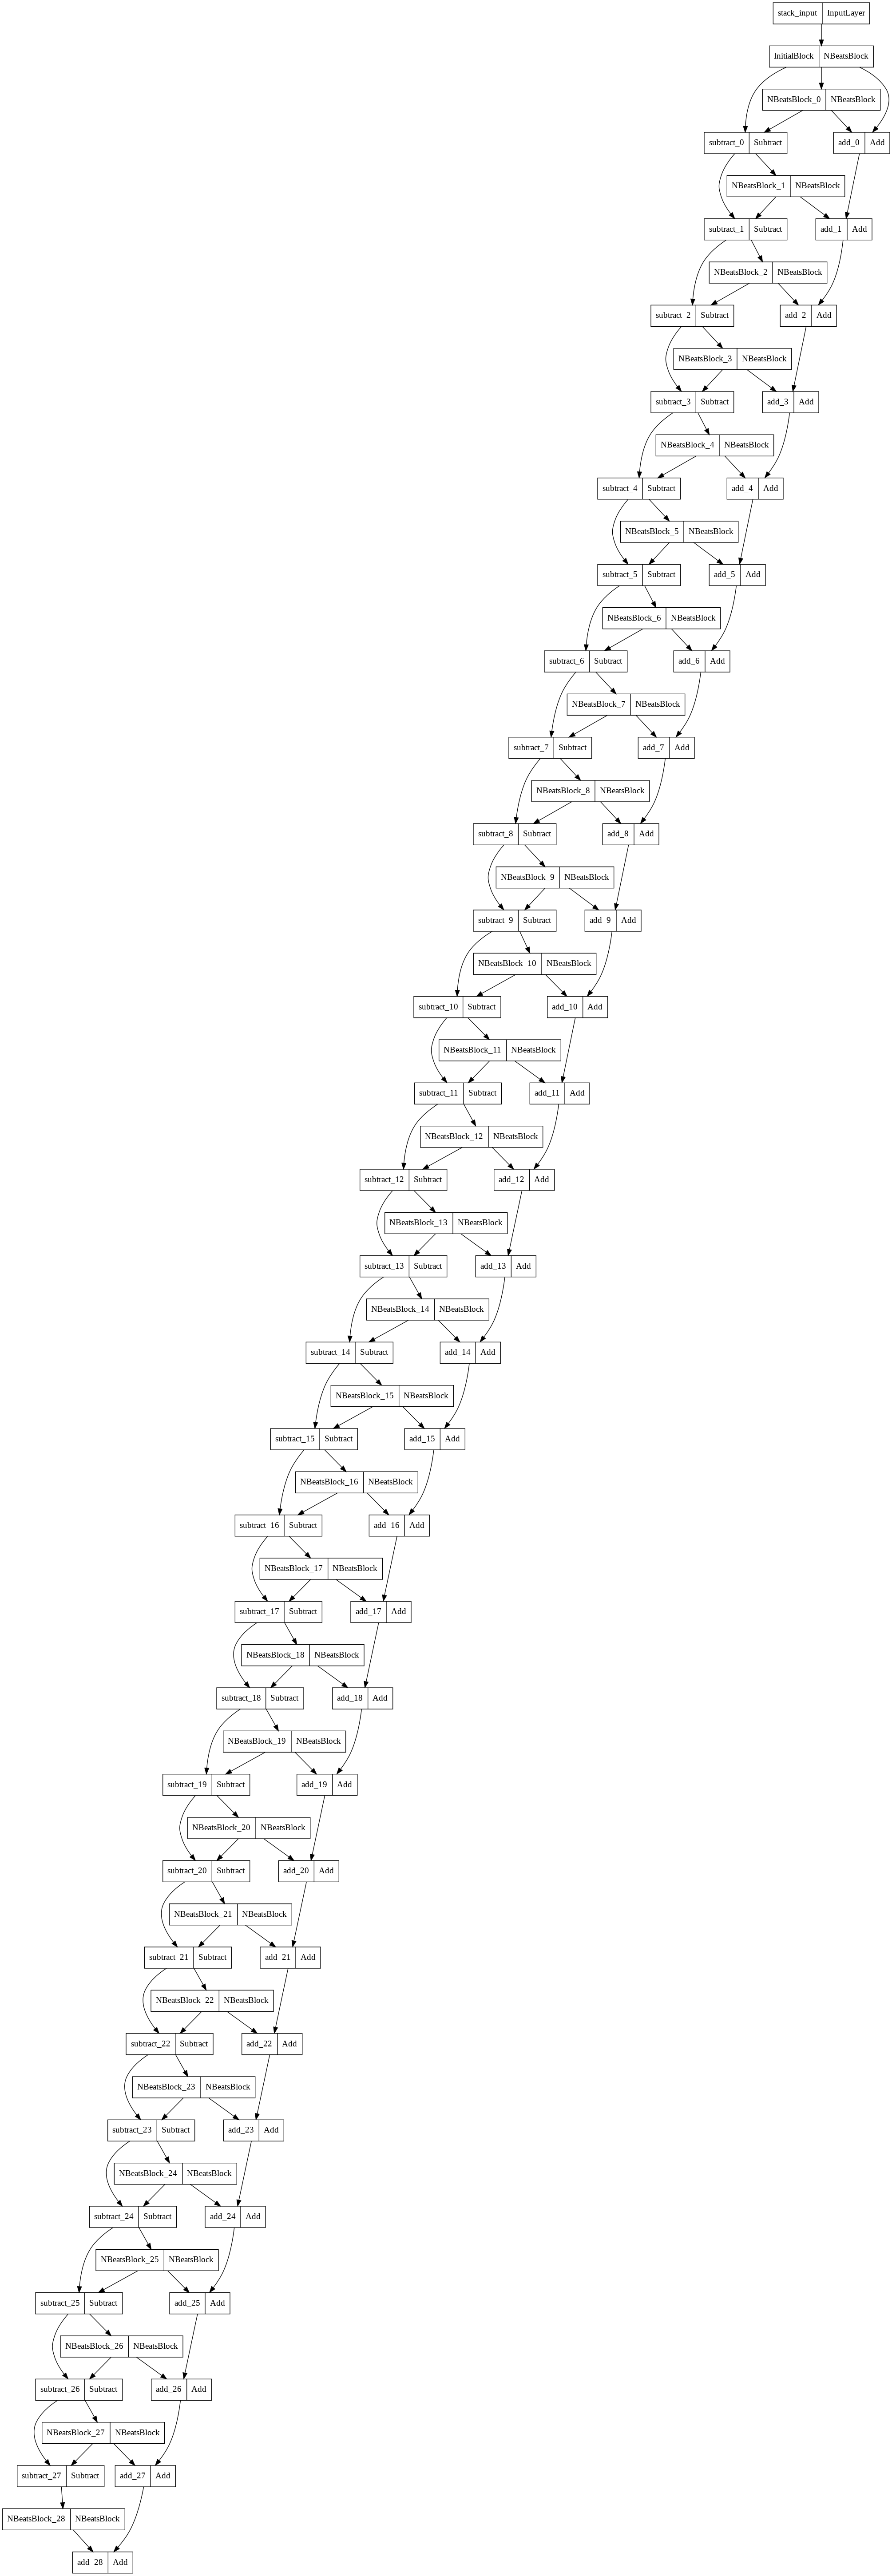

In [ ]:
# plot nbeats model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: create ensemble (stacking diffret models together)

In [ ]:
WINDOW_SIZE, HORIZON

(7, 1)

### constructing and fitting the ensemble of models

In [ ]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models


In [ ]:
%%time
# get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 487: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 587: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 362: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 462: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 185: ReduceLROnPlateau reduci

In [ ]:
!nvidia-smi

Sat Mar 26 04:58:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    72W / 149W |   1305MiB / 11441MiB |      7%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Make predictions with our ensemble model

In [ ]:
# create a function which teakes a list of functions and return list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds=model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))
  

In [ ]:
%%time

ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)

ensemble_preds

CPU times: user 734 ms, sys: 58.8 ms, total: 793 ms
Wall time: 761 ms


In [ ]:
ensemble_preds

<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8763.133,  8766.515,  9054.852, ..., 50434.008, 49798.418,
        46693.977],
       [ 8794.182,  8746.594,  8998.615, ..., 49019.6  , 48783.387,
        45562.957],
       [ 8732.569,  8719.409,  9093.388, ..., 49921.91 , 47992.137,
        45316.44 ],
       ...,
       [ 8831.455,  8759.536,  9085.495, ..., 49316.1  , 49401.406,
        46182.28 ],
       [ 8726.256,  8802.404,  9100.906, ..., 49583.066, 48523.785,
        45037.74 ],
       [ 8815.926,  8760.638,  9039.794, ..., 49716.785, 48040.94 ,
        45816.004]], dtype=float32)>

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8782.988, 8775.208, 9061.724, 8716.806, 8743.083, 8713.899,
       8655.187, 8474.118, 8452.713, 8518.401], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)
ensemble_median

array([ 8794.182 ,  8769.737 ,  9054.852 ,  8704.07  ,  8749.577 ,
        8725.14  ,  8647.92  ,  8475.958 ,  8449.495 ,  8515.768 ,
        8192.294 ,  8101.1777,  8044.5083,  7624.232 ,  7271.934 ,
        7297.3003,  7077.459 ,  7205.639 ,  7113.374 ,  7540.653 ,
        7380.7056,  7733.8   ,  7556.9014,  7387.181 ,  7327.3037,
        7299.2217,  7197.254 ,  7385.619 ,  7497.4424,  7536.145 ,
        7545.2617,  7331.43  ,  7231.1367,  7173.8945,  7176.334 ,
        7224.598 ,  7069.252 ,  7095.382 ,  6859.4775,  6583.8457,
        7404.0503,  7164.8296,  7175.869 ,  7254.516 ,  7249.487 ,
        7187.615 ,  7216.136 ,  7198.958 ,  7173.0796,  7206.385 ,
        7298.2036,  7377.3745,  7246.1714,  7166.189 ,  7156.8535,
        6942.37  ,  7273.214 ,  7323.879 ,  7358.2676,  7703.769 ,
        8060.248 ,  8126.7207,  7845.43  ,  8081.2065,  8095.706 ,
        8168.551 ,  8090.6387,  8732.087 ,  8892.968 ,  8767.947 ,
        8934.754 ,  8966.903 ,  8670.353 ,  8627.353 ,  8684.4

In [ ]:
# evaluate ensemble predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 568.0941,
 'mape': 2.5876856,
 'mase': 0.6916256,
 'mse': 1144341.8,
 'rmse': 1069.7391}

###Plotting the prediction intervals (uncertainty estimates) of our ensemble

In [ ]:
# find the upper ad lower bound of prediction intervals
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  #2 measure the standard deviation
  std = tf.math.reduce_std(preds, axis=0)

  #3. multiply the standard deviation by 1.96
  interval = 1.96 * std

  #4 get prediction intervals upper and lower bound
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper


In [ ]:
lower, upper = get_upper_lower(preds=ensemble_preds)
lower, upper

(<tf.Tensor: shape=(556,), dtype=float32, numpy=
 array([ 8704.101 ,  8728.738 ,  8994.316 ,  8630.9   ,  8664.491 ,
         8637.817 ,  8588.358 ,  8397.685 ,  8391.181 ,  8477.777 ,
         8128.421 ,  8046.8765,  7987.0024,  7562.876 ,  7214.4644,
         7216.967 ,  6972.098 ,  7125.7637,  6996.2583,  7453.652 ,
         7308.376 ,  7681.7656,  7472.0645,  7275.41  ,  7250.4883,
         7249.2725,  7138.353 ,  7344.522 ,  7448.1978,  7499.308 ,
         7486.771 ,  7275.8105,  7188.869 ,  7137.142 ,  7137.8945,
         7169.0244,  7015.5005,  7061.655 ,  6812.929 ,  6543.8223,
         7289.1978,  7061.4146,  7038.9116,  7157.6436,  7099.3574,
         7066.928 ,  7175.7056,  7167.7427,  7142.7656,  7173.421 ,
         7263.441 ,  7344.08  ,  7197.442 ,  7126.3457,  7130.3545,
         6897.8438,  7233.1426,  7258.1597,  7310.186 ,  7610.3994,
         7987.5117,  8075.4766,  7781.3164,  8021.5957,  8015.0356,
         8132.0815,  8022.2305,  8687.242 ,  8812.558 ,  8673.456 ,

In [ ]:
# # get the median/mean values of our ensemble preds
# ensemble_median = np.median(ensemble_preds, axis=0)

# #plot median of our ensemble preds along wwith  prediction intervals
# offset=500
# plt.figure(figsize=(10,7))
# plt.plot(X_test.index[offset:], y_test.index[offset:], "g", label="Test Data" )
# plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
# plt.xlabel("Date")
# plt.ylabel("BTC Price")
# # to plot upper and lowe bound
# plt.fill_between(X_test.index[offset:],
#                  (lower)[offset:],
#                  (upper)[offset:], label="Prediction intervals")
# plt.legend(loc="upper left", fontsize=14);

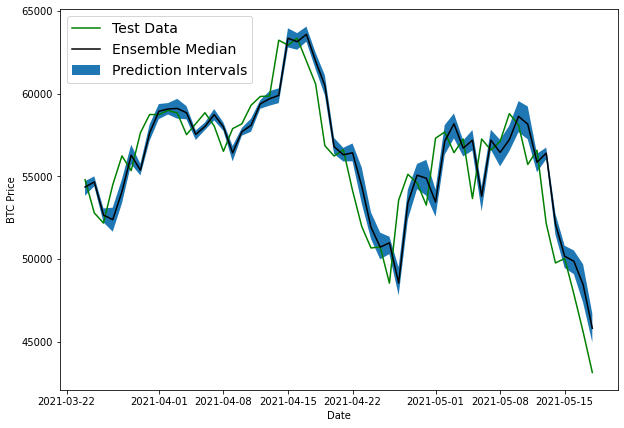

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

## Model9 Train a model on historical data to make predictions in the future



In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Closing Price (USD),block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed.tail()

,Closing Price (USD),block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
X_all = bitcoin_prices_windowed.dropna().drop(["Closing Price (USD)", "block_reward"], axis=1).to_numpy()

y_all = bitcoin_prices_windowed.dropna()["Closing Price (USD)"].to_numpy()
len(X_all), len(y_all)

(2780, 2780)

In [ ]:
X_all[:5]

array([[121.795  , 120.65533, 121.33866, 118.67466, 108.58483, 125.455  ,
        123.65499],
       [123.033  , 121.795  , 120.65533, 121.33866, 118.67466, 108.58483,
        125.455  ],
       [124.049  , 123.033  , 121.795  , 120.65533, 121.33866, 118.67466,
        108.58483],
       [125.96116, 124.049  , 123.033  , 121.795  , 120.65533, 121.33866,
        118.67466],
       [125.27966, 125.96116, 124.049  , 123.033  , 121.795  , 120.65533,
        121.33866]])

In [ ]:
y_all[:5]

array([123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ])

In [ ]:
# turn data into efficient tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# combine feature and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))


# batch and speed up  for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) 

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
     layers.Dense(128, activation="relu"),
     layers.Dense(128, activation="relu"),
     layers.Dense(HORIZON)
], name="model_9_future_model")

model_9.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                )
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into future

In [ ]:
# how many time steps to predict into the future
INTO_FUTURE = 14

In [ ]:
y_all[WINDOW_SIZE:]

array([  133.20333   ,   142.76333   ,   137.92333   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
y_all[-WINDOW_SIZE:]

array([56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361, 43144.47129086])

In [ ]:
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecast into_future steps after value ends

  Returns future forecast as a list of floats
  """
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # make INTO_FUTURE number of predictions, altering the data which gets predicted on each
  for _ in range(INTO_FUTURE):
    # predict on the last window and append it again and again
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast





In [ ]:
# make future forecast
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

Predicting on:
 [56573.5554719  52147.82118698 49764.1320816  50032.69313676
 47885.62525472 45604.61575361 43144.47129086] -> Prediction: 55764.46484375

Predicting on:
 [52147.82118698 49764.1320816  50032.69313676 47885.62525472
 45604.61575361 43144.47129086 55764.46484375] -> Prediction: 50985.9453125

Predicting on:
 [49764.1320816  50032.69313676 47885.62525472 45604.61575361
 43144.47129086 55764.46484375 50985.9453125 ] -> Prediction: 48522.96484375

Predicting on:
 [50032.69313676 47885.62525472 45604.61575361 43144.47129086
 55764.46484375 50985.9453125  48522.96484375] -> Prediction: 48137.203125

Predicting on:
 [47885.62525472 45604.61575361 43144.47129086 55764.46484375
 50985.9453125  48522.96484375 48137.203125  ] -> Prediction: 47880.63671875

Predicting on:
 [45604.61575361 43144.47129086 55764.46484375 50985.9453125
 48522.96484375 48137.203125   47880.63671875] -> Prediction: 46879.71875

Predicting on:
 [43144.47129086 55764.46484375 50985.9453125  48522.96484375


In [ ]:
len(future_forecast)

14

In [ ]:
def get_future_dates(start_date, into_future, offset=1):
  start_date = start_date + np.timedelta64(offset, "D")
  end_date = start_date + np.timedelta64(into_future, "D")
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
# get next two weeks of time steps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future = INTO_FUTURE)

next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
bitcoin_prices.index

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2021-05-09', '2021-05-10', '2021-05-11', '2021-05-12',
               '2021-05-13', '2021-05-14', '2021-05-15', '2021-05-16',
               '2021-05-17', '2021-05-18'],
              dtype='datetime64[ns]', name='Date', length=2787, freq=None)

In [ ]:
btc_price

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116,
 125.27966,
 125.9275,
 126.38333,
 135.24199,
 133.20333,
 142.76333,
 137.92333,
 142.95166,
 152.55183,
 160.33883,
 164.31499,
 177.63333,
 188.29716,
 200.70166,
 180.355,
 175.03166,
 177.6965,
 187.15983,
 192.75666,
 197.4,
 196.02499,
 198.04883,
 198.93233,
 200.543,
 210.3075,
 225.02,
 248.25333,
 262.32666,
 294.48699,
 331.10325,
 285.8875,
 304.97974,
 338.137,
 357.48,
 402.954,
 409.10375,
 420.21649,
 437.29725,
 510.6025,
 693.65,
 531.54249,
 574.71599,
 681.33,
 774.18,
 746.19374,
 768.8475,
 789.36475,
 893.1815,
 934.355,
 1068.363,
 1154.92593,
 1099.51926,
 1019.78966,
 1028.845,
 1071.2848,
 1139.33083,
 1004.61633,
 759.43041,
 689.81,
 841.83966,
 916.77599,
 967.42866,
 866.29003,
 911.23204,
 889.81946,
 848.9975,
 868.95316,
 653.80483,
 654.06266,
 553.69166,
 693.05883,
 649.38965,
 595.95883,
 647.68316,
 671.58116,
 659.84333,
 702.00083,
 

In [ ]:
future_forecast

[55764.465,
 50985.945,
 48522.965,
 48137.203,
 47880.637,
 46879.72,
 48227.6,
 53963.69,
 49685.56,
 47596.176,
 48114.43,
 48808.008,
 48623.855,
 50178.723]

In [ ]:
# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.473, 55764.465, 50985.945, 48522.965, 48137.203, 47880.637,
        46879.72 , 48227.6  , 53963.69 , 49685.56 , 47596.176, 48114.43 ,
        48808.008, 48623.855, 50178.723], dtype=float32))

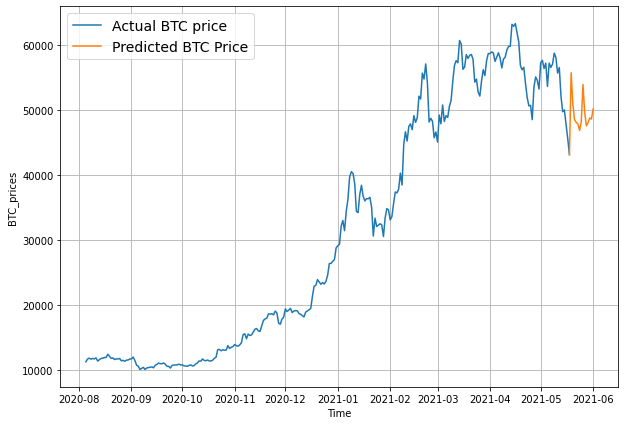

In [ ]:
# plot future price predictionsof bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500,  format="-", label="Actual BTC price" )
plot_time_series(next_time_steps, future_forecast,format="-", label="Predicted BTC Price")

##Model 10

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [ ]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [ ]:
np.array(btc_price_turkey.index)

array(<built-in method index of list object at 0x7fdfca2bbe10>,
      dtype=object)

In [ ]:
# time steps 
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

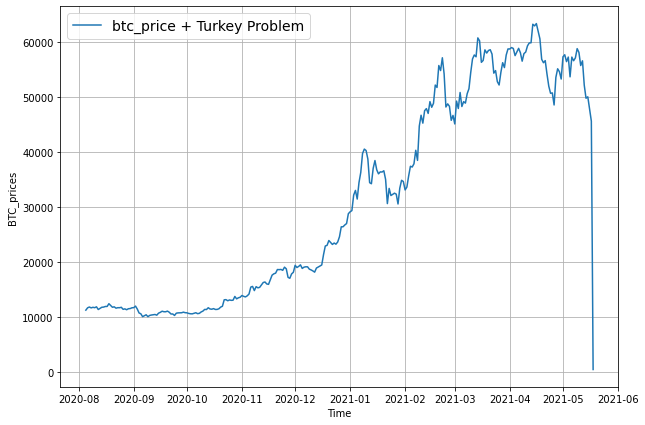

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="btc_price + Turkey Problem",
                 start=2500,
                 )

In [ ]:
# make train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train)

2224

In [ ]:
model_1.summary()

Model: "model_1_Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


### Build a turkey model (model to predict on turkey data)


In [ ]:
# clone model 1
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                      optimizer = tf.keras.optimizers.Adam(),
                      )
turkey_model.fit(X_train, y_train,
                 epochs=100,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 903.7134 INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 41ms/step - loss: 872.2477 - val_loss: 2565.6565
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 255.1253INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 255.1253 - val_loss: 1263.9492
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 192.6274INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 192.6274 - val_loss: 1083.5791
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 182.8374INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 182.8374 - val_loss: 1064.2086
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 178.3933 - val_loss: 1091.3678
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 128.7114INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 173.1582 - val_loss: 1021.9824
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 166.4281INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 166.4281 - val_loss: 1001.4644
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 135.8991INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 164.0680 - val_loss: 977.3112
Epoch 9/100
18/18 [==============================] - ETA: 0s - loss: 162.1670INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 162.1670 - val_loss: 971.7230
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 165.1017INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 157.4818 - val_loss: 936.1541
Epoch 11/100
18/18 [==============================] - 0s 6ms/step - loss: 154.9980 - val_loss: 954.7531
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 151.5755 - val_loss: 942.0197
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 130.5429INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 149.1355 - val_loss: 904.2537
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 145.2415 - val_loss: 924.0132
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 151.1750INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 144.2233 - val_loss: 856.6980
Epoch 16/100
 1/18 [>.............................] - ETA: 0s - loss: 123.1395INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 139.5884 - val_loss: 849.1546
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 138.2248 - val_loss: 877.6005
Epoch 18/100
18/18 [==============================] - 0s 6ms/step - loss: 140.2888 - val_loss: 852.4634
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 135.2619 - val_loss: 850.4728
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 153.0738INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 132.7787 - val_loss: 798.8018
Epoch 21/100
18/18 [==============================] - ETA: 0s - loss: 135.5090INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 135.5090 - val_loss: 797.9442
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 130.4897 - val_loss: 804.8860
Epoch 23/100
18/18 [==============================] - 0s 4ms/step - loss: 133.9297 - val_loss: 813.4089
Epoch 24/100
14/18 [======================>.......] - ETA: 0s - loss: 130.4256INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 128.4334 - val_loss: 775.0634
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 141.0958INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 125.9183 - val_loss: 754.0869
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 125.9140INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 125.9140 - val_loss: 746.1556
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 173.7110INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 60ms/step - loss: 126.6562 - val_loss: 741.0801
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 122.5802INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 122.5802 - val_loss: 733.1731
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 121.2898 - val_loss: 733.4421
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 127.6305INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 126.9631 - val_loss: 725.7657
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8071 - val_loss: 764.5601
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 121.7338INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 121.7338 - val_loss: 713.8320
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 120.7237 - val_loss: 733.0150
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 120.0046 - val_loss: 714.4729
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 116.7568INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 116.4001 - val_loss: 707.1638
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 119.8528 - val_loss: 709.7528
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 118.5535INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 118.5535 - val_loss: 694.5596
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1655 - val_loss: 697.6488
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 132.4243INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 115.9841 - val_loss: 692.2269
Epoch 40/100
17/18 [===========================>..] - ETA: 0s - loss: 114.6090INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 114.2697 - val_loss: 683.4119
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8686 - val_loss: 689.2540
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5061 - val_loss: 700.9631
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 116.9887 - val_loss: 728.7309
Epoch 44/100
 1/18 [>.............................] - ETA: 0s - loss: 74.0561INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 116.4884 - val_loss: 675.3562
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2970 - val_loss: 690.3704
Epoch 46/100
18/18 [==============================] - 0s 4ms/step - loss: 112.1394 - val_loss: 702.5387
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 112.9260 - val_loss: 695.6752
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0560 - val_loss: 702.2733
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6018 - val_loss: 682.7745
Epoch 50/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2127 - val_loss: 691.1290
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1090 - val_loss: 698.1920
Epoch 52/100
18/18 [==============================] - 0s 5ms/step - loss: 114.5734 - val_loss: 688.8264
Epoch 53/100
18/18 [==============================] - 0s 5ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 114.6987 - val_loss: 661.3846
Epoch 55/100
17/18 [===========================>..] - ETA: 0s - loss: 118.1098INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 116.8230 - val_loss: 656.3773
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 112.6100 - val_loss: 923.8615
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 138.1590 - val_loss: 833.7075
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 124.0106 - val_loss: 731.3058
Epoch 59/100
 1/18 [>.............................] - ETA: 0s - loss: 79.6891INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 111.5391 - val_loss: 655.2633
Epoch 60/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9623 - val_loss: 709.1118
Epoch 61/100
18/18 [==============================] - ETA: 0s - loss: 110.4407INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 110.4407 - val_loss: 650.7392
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0657 - val_loss: 664.2856
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 111.2734 - val_loss: 679.3955
Epoch 64/100
18/18 [==============================] - 0s 4ms/step - loss: 109.0036 - val_loss: 666.4182
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 109.6458 - val_loss: 679.5121
Epoch 66/100
15/18 [========================>.....] - ETA: 0s - loss: 110.0850INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 109.1586 - val_loss: 649.9113
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1966 - val_loss: 721.7228
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9775 - val_loss: 773.4610
Epoch 69/100
 1/18 [>.............................] - ETA: 0s - loss: 108.7551INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 122.0064 - val_loss: 644.1106
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1914 - val_loss: 688.5815
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 115.6782 - val_loss: 669.3754
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 109.0674 - val_loss: 649.3907
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 111.6763 - val_loss: 710.1674
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 106.7881INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 106.7881 - val_loss: 642.3007
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3419 - val_loss: 658.9415
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 108.5580INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 33ms/step - loss: 108.6011 - val_loss: 642.0534
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 106.0180 - val_loss: 643.4089
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 108.0433 - val_loss: 665.7311
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3296 - val_loss: 649.8022
Epoch 80/100
18/18 [==============================] - 0s 4ms/step - loss: 107.4339 - val_loss: 652.9858
Epoch 81/100
18/18 [==============================] - ETA: 0s - loss: 105.6956INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 32ms/step - loss: 105.6956 - val_loss: 641.1263
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 117.2129 - val_loss: 646.5959
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.4180 - val_loss: 805.4776
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7454 - val_loss: 660.3789
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 107.9126 - val_loss: 672.2751
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 106.8772 - val_loss: 662.5192
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 108.6426 - val_loss: 656.1647
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 107.5260 - val_loss: 647.2575
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 106.4577 - val_loss: 642.6853
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets


18/18 [==============================] - 1s 34ms/step - loss: 110.2939 - val_loss: 640.1680
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 115.2457 - val_loss: 680.7300
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5903 - val_loss: 650.1013
Epoch 95/100
18/18 [==============================] - 0s 6ms/step - loss: 105.2163 - val_loss: 644.4609
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 105.7878 - val_loss: 643.4609
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 104.7348 - val_loss: 660.9088
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1238 - val_loss: 665.7190
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7607 - val_loss: 649.8104
Epoch 100/100
18/18 [==============================] - 0s 4ms/step - loss: 113.4878 - val_loss: 719.4105


In [ ]:
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 719.4105


719.4105224609375

In [ ]:
# load the best performing model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8706.834, 8644.933, 8891.146, 8639.536, 8614.645, 8597.19 ,
       8535.674, 8403.296, 8320.213, 8395.925], dtype=float32)>

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17002.893,
 'mape': 119.54726,
 'mase': 1.0006738,
 'mse': 605279700.0,
 'rmse': 23463.684}

In [ ]:
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.688677,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
X_test[:5]

array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
        9335.75240233, 9226.48582088, 8794.35864452],
       [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
        9226.48582088, 8794.35864452, 8798.04205463],
       [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
        8794.35864452, 8798.04205463, 9081.18687849],
       [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
        8798.04205463, 9081.18687849, 8711.53433917],
       [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
        9081.18687849, 8711.53433917, 8760.89271814]])

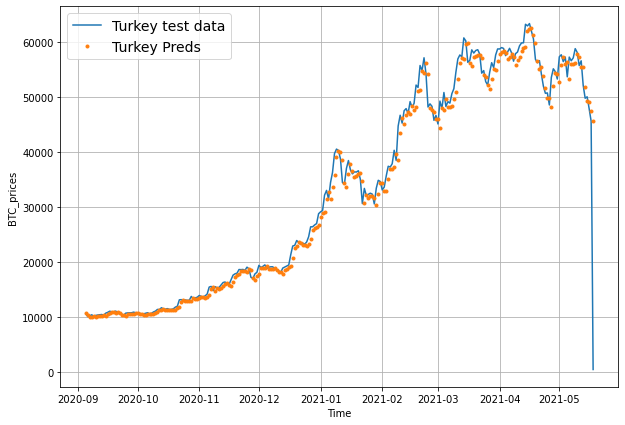

In [ ]:
plt.figure(figsize=(10, 7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey test data", 
                 start=offset
                 )
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

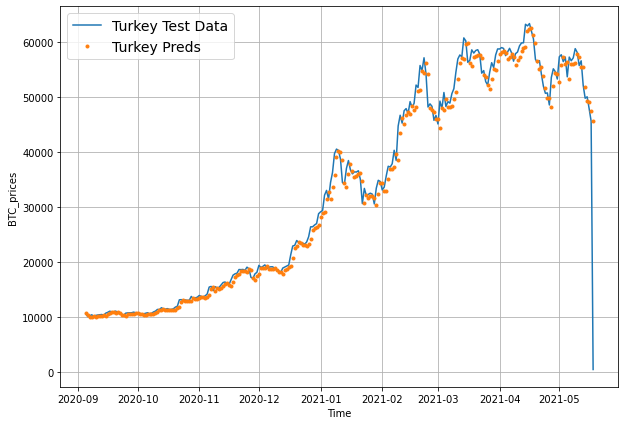

In [ ]:
plt.figure(figsize=(10, 7))
# plot_time_series(timesteps=btc_timesteps_turkey[:split_size], values=btc_price_turkey[:split_size], label="Train Data")
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):], 
                 values=btc_price_turkey[-len(y_test):], 
                 format="-", 
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds, 
                 label="Turkey Preds", 
                 start=offset)

##Compare models

In [ ]:
model_results = pd.DataFrame({"naive model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive model,567.980225,1.147547e+06,1071.236206,2.516525,0.692124
model_1_dense_w7_h1,568.951233,1.171744e+06,1082.471313,2.544898,0.688677
model_2_dense_w30_h1,608.961487,1.281439e+06,1132.006470,2.769339,0.711573
model_4_CONV1D,564.036438,1.155166e+06,1074.786621,2.529680,0.685586
model_5_LSTM,568.950012,1.174135e+06,1083.574951,2.538132,0.690805
model_6_multivariate,567.586304,1.161687e+06,1077.816040,2.541375,0.690044
model_8_NBEATs,573.461731,1.172638e+06,1082.884155,2.575777,0.687984
model_9_ensemble,568.094116,1.144342e+06,1069.739136,2.587686,0.691626
model_10_turkey,17002.892578,6.052797e+08,23463.683594,119.547256,1.000674


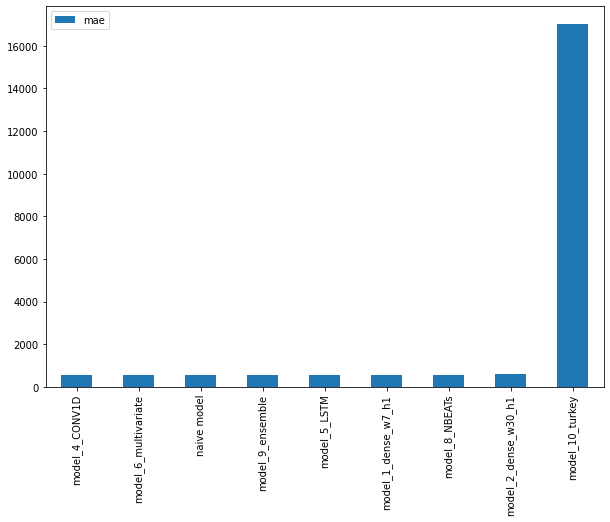

In [ ]:
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")